3 - Considere um problema de classificação bidimensional

<module 'matplotlib.pyplot' from 'C:\\Users\\Tiago-note\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

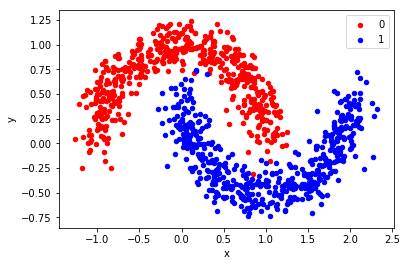

In [18]:
#importanto função para auxiliar na geração de dados não separaveis linearmente
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

# Gerando dataset não linear
X, y = make_moons(n_samples=1000, noise=0.13)
# scatter plot, dots colored by class value
df_data = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
df_agrupado = df_data.groupby('label')
for key, group in df_agrupado:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
    
pyplot

In [19]:
#O MLP precisa ser feito na mão?????? Oo
#Se sim me desculpe, vou usar o MLP do sklearn

In [23]:
df_agrupado.head()

,x,y,label
0,0.519463,-0.444063,1
1,1.817789,-0.279317,1
2,1.270416,-0.209937,1
3,-1.267157,0.046357,0
4,0.261081,-0.008428,1
5,0.917016,-0.330999,1
6,-0.233529,0.837446,0
7,0.662456,0.842737,0
8,-0.854239,0.616023,0
9,0.920702,0.394566,0


In [26]:
y = df_data['label']
x = df_data.drop(['label'], axis=1)

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#separação dos dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.40, random_state=35)

In [51]:
# 1 hidden layers com 2 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao1 = classificador.predict( x_test )

#claculando o score
score_1_2 = accuracy_score(y_test, y_predicao1)

print( '1 Hidden Layers - 2 neuronios: ' + str(score_1_2))

1 Hidden Layers - 2 neuronios: 0.47


In [52]:
# 1 hidden layers com 5 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(5,), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao2 = classificador.predict( x_test )

#claculando o score
score_1_5 = accuracy_score(y_test, y_predicao2)

print( '1 Hidden Layers - 5 neuronios: ' + str(score_1_5))


1 Hidden Layers - 5 neuronios: 0.88


In [53]:
# 2 hidden layers com 5 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 5), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao3 = classificador.predict( x_test )

#claculando o score
score_2_5 = accuracy_score(y_test, y_predicao3)

print( '2 Hidden Layers - 5 neuronios: ' + str(score_2_5))

2 Hidden Layers - 5 neuronios: 0.89


In [54]:
# 2 hidden layers com 9 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(9, 9), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao4 = classificador.predict( x_test )

#claculando o score
score_2_9 = accuracy_score(y_test, y_predicao4)

print( '2 Hidden Layers - 9 neuronios: ' + str(score_2_9))

2 Hidden Layers - 9 neuronios: 0.97


In [76]:
# 2 hidden layers com 30 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(30, 30), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao5 = classificador.predict( x_test )

#claculando o score
score_2_30 = accuracy_score(y_test, y_predicao5)

print( '2 Hidden Layers - 30 neuronios: ' + str(score_2_30))

2 Hidden Layers - 30 neuronios: 0.97


Foram gerados 5 MLPs diferentes para 1000 objetos:
- (2)
- (5)
- (5,5)
- (9,9)
- (30,30)

A seguir estão apresentados os valores do score e os erros apresentados na forma de matriz de confusão para cada um dos MLPs:

In [77]:
#score de todos modelos
print( '1 Hidden Layers - 2 neuronios: ' + str(score_1_2))
print( '1 Hidden Layers - 5 neuronios: ' + str(score_1_5))
print( '2 Hidden Layers - 5 neuronios: ' + str(score_2_5))
print( '2 Hidden Layers - 9 neuronios: ' + str(score_2_9))
print( '2 Hidden Layers - 30 neuronios: ' + str(score_2_30))

1 Hidden Layers - 2 neuronios: 0.47
1 Hidden Layers - 5 neuronios: 0.88
2 Hidden Layers - 5 neuronios: 0.89
2 Hidden Layers - 9 neuronios: 0.97
2 Hidden Layers - 30 neuronios: 0.97


Podemos observar que não adiantar aumentar o número de neuronios acima de 9.

A seguir podemos observar a matrix de confusão para ter um maior detalhamento do erros de classificação obtidos por cada um dos modelos

In [78]:
#matrizes de confusão
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_test, y_predicao1)
print( '1 Hidden Layers - 2 neuronios: ' + str(score_1_2))
print( 'MATRIX CONFUSÃO')
print( str(mc))

1 Hidden Layers - 2 neuronios: 0.47
MATRIX CONFUSÃO
[[188   0]
 [212   0]]


In [79]:
mc = confusion_matrix(y_test, y_predicao2)
print( '1 Hidden Layers - 5 neuronios: ' + str(score_1_5))
print( 'MATRIX CONFUSÃO')
print( str(mc))

1 Hidden Layers - 5 neuronios: 0.88
MATRIX CONFUSÃO
[[171  17]
 [ 31 181]]


In [80]:
mc = confusion_matrix(y_test, y_predicao3)
print( '2 Hidden Layers - 5 neuronios: ' + str(score_2_5))
print( 'MATRIX CONFUSÃO')
print( str(mc))

2 Hidden Layers - 5 neuronios: 0.89
MATRIX CONFUSÃO
[[171  17]
 [ 27 185]]


In [81]:
mc = confusion_matrix(y_test, y_predicao4)
print( '2 Hidden Layers - 9 neuronios: ' + str(score_2_9))
print( 'MATRIX CONFUSÃO')
print( str(mc))

2 Hidden Layers - 9 neuronios: 0.97
MATRIX CONFUSÃO
[[184   4]
 [  8 204]]


In [82]:
mc = confusion_matrix(y_test, y_predicao5)
print( '2 Hidden Layers - 30 neuronios: ' + str(score_2_30))
print( 'MATRIX CONFUSÃO')
print( str(mc))

2 Hidden Layers - 30 neuronios: 0.97
MATRIX CONFUSÃO
[[184   4]
 [  8 204]]


Agora será utilizado um conjunto 5000 objetos

<module 'matplotlib.pyplot' from 'C:\\Users\\Tiago-note\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

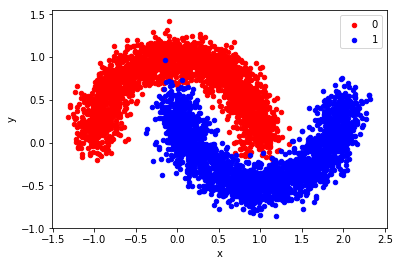

In [83]:
# Gerando dataset não linear
X, y = make_moons(n_samples=5000, noise=0.13)
# scatter plot, dots colored by class value
df_data = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
df_agrupado = df_data.groupby('label')
for key, group in df_agrupado:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
    
pyplot

In [84]:
y = df_data['label']
x = df_data.drop(['label'], axis=1)

In [85]:
#separação dos dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.40, random_state=35)

In [86]:
# 1 hidden layers com 2 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao1 = classificador.predict( x_test )

#claculando o score
score_1_2 = accuracy_score(y_test, y_predicao1)

print( '1 Hidden Layers - 2 neuronios: ' + str(score_1_2))

1 Hidden Layers - 2 neuronios: 0.515


In [87]:
# 1 hidden layers com 5 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(5,), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao2 = classificador.predict( x_test )

#claculando o score
score_1_5 = accuracy_score(y_test, y_predicao2)

print( '1 Hidden Layers - 5 neuronios: ' + str(score_1_5))

1 Hidden Layers - 5 neuronios: 0.884


In [88]:
# 2 hidden layers com 5 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 5), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao3 = classificador.predict( x_test )

#claculando o score
score_2_5 = accuracy_score(y_test, y_predicao3)

print( '2 Hidden Layers - 5 neuronios: ' + str(score_2_5))

2 Hidden Layers - 5 neuronios: 0.8975


In [89]:
# 2 hidden layers com 9 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(9, 9), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao4 = classificador.predict( x_test )

#claculando o score
score_2_9 = accuracy_score(y_test, y_predicao4)

print( '2 Hidden Layers - 9 neuronios: ' + str(score_2_9))

2 Hidden Layers - 9 neuronios: 0.9935


In [90]:
# 2 hidden layers com 30 neuronios
classificador = MLPClassifier( solver='sgd', alpha=1e-5, hidden_layer_sizes=(30, 30), max_iter=5000, random_state=1 )
#treinando
classificador.fit(x_train,y_train)

#realizando a predição para poder verificar o score do modelo
y_predicao5 = classificador.predict( x_test )

#claculando o score
score_2_30 = accuracy_score(y_test, y_predicao5)

print( '2 Hidden Layers - 30 neuronios: ' + str(score_2_30))

2 Hidden Layers - 30 neuronios: 0.992


Foram gerados 5 MLPs diferentes para 5000 objetos:
- (2)
- (5)
- (5,5)
- (9,9)
- (30,30)

A seguir estão apresentados os valores do score e os erros apresentados na forma de matriz de confusão para cada um dos MLPs:

In [91]:
#score de todos modelos
print( '1 Hidden Layers - 2 neuronios: ' + str(score_1_2))
print( '1 Hidden Layers - 5 neuronios: ' + str(score_1_5))
print( '2 Hidden Layers - 5 neuronios: ' + str(score_2_5))
print( '2 Hidden Layers - 9 neuronios: ' + str(score_2_9))
print( '2 Hidden Layers - 30 neuronios: ' + str(score_2_30))

1 Hidden Layers - 2 neuronios: 0.515
1 Hidden Layers - 5 neuronios: 0.884
2 Hidden Layers - 5 neuronios: 0.8975
2 Hidden Layers - 9 neuronios: 0.9935
2 Hidden Layers - 30 neuronios: 0.992


In [92]:
mc = confusion_matrix(y_test, y_predicao1)
print( '1 Hidden Layers - 2 neuronios: ' + str(score_1_2))
print( 'MATRIX CONFUSÃO')
print( str(mc))

1 Hidden Layers - 2 neuronios: 0.515
MATRIX CONFUSÃO
[[1030    0]
 [ 970    0]]


In [93]:
mc = confusion_matrix(y_test, y_predicao2)
print( '1 Hidden Layers - 5 neuronios: ' + str(score_1_5))
print( 'MATRIX CONFUSÃO')
print( str(mc))

1 Hidden Layers - 5 neuronios: 0.884
MATRIX CONFUSÃO
[[900 130]
 [102 868]]


In [94]:
mc = confusion_matrix(y_test, y_predicao3)
print( '2 Hidden Layers - 5 neuronios: ' + str(score_2_5))
print( 'MATRIX CONFUSÃO')
print( str(mc))

2 Hidden Layers - 5 neuronios: 0.8975
MATRIX CONFUSÃO
[[902 128]
 [ 77 893]]


In [95]:
mc = confusion_matrix(y_test, y_predicao4)
print( '2 Hidden Layers - 9 neuronios: ' + str(score_2_9))
print( 'MATRIX CONFUSÃO')
print( str(mc))

2 Hidden Layers - 9 neuronios: 0.9935
MATRIX CONFUSÃO
[[1022    8]
 [   5  965]]


In [96]:
mc = confusion_matrix(y_test, y_predicao5)
print( '2 Hidden Layers - 30 neuronios: ' + str(score_2_30))
print( 'MATRIX CONFUSÃO')
print( str(mc))

2 Hidden Layers - 30 neuronios: 0.992
MATRIX CONFUSÃO
[[1020   10]
 [   6  964]]
